In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [12]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [13]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

### 增加噪声

In [14]:
factor = 0.5

In [15]:
x_train_noise = x_train + factor*np.random.normal(size=(x_train.shape))
x_test_noise = x_test + factor*np.random.normal(size=(x_test.shape))

# 控制数据在0~1之间
x_train_noise = np.clip(x_train_noise, 0, 1)
x_test_noise = np.clip(x_test_noise, 0, 1)

### 构建模型

In [17]:
inputs = tf.keras.layers.Input(shape=x_train_noise.shape[1:])

# encoder
en = tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same")(inputs)
en = tf.keras.layers.MaxPooling2D(padding="same")(en)
en = tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same")(en)
en = tf.keras.layers.MaxPooling2D(padding="same")(en)

# decoder
de = tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same", activation="relu")(en)
de = tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same", activation="sigmoid")(de)

model = tf.keras.Model(inputs=inputs, outputs=de)

### 可视化绘制模型

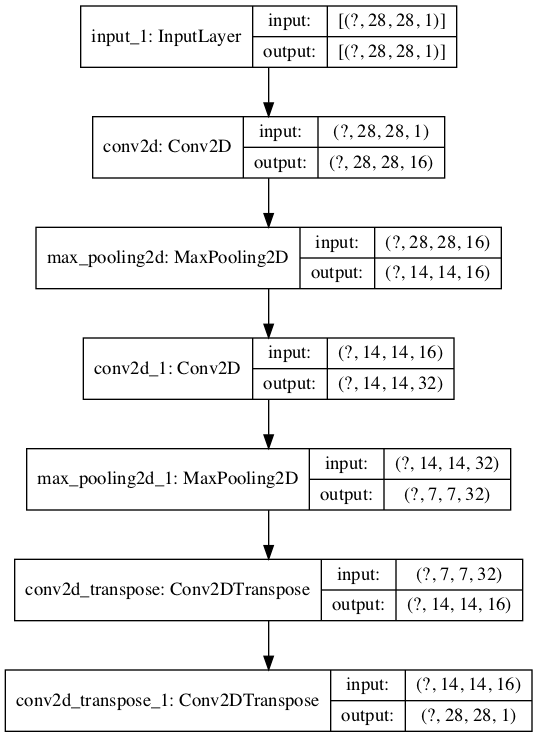

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [19]:
model.compile(optimizer="adam", loss="mse")

In [22]:
# 这里需要注意的是输入的数据和验证的数据都是一样的， 同理测试数据也相同。
model.fit(x_train_noise, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noise, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0196 - val_loss: 0.0186
Epoch 2/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0182 - val_loss: 0.0175
Epoch 3/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0174 - val_loss: 0.0168
Epoch 4/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0168 - val_loss: 0.0163
Epoch 5/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0164 - val_loss: 0.0159
Epoch 6/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.0160 - val_loss: 0.0157
Epoch 7/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0158 - val_loss: 0.0154
Epoch 8/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0155 - val_loss: 0.0152
Epoch 9/10
60000/60000 [==============================] - 13s 214us/sample - l

In [26]:
predict = model.predict(x_test_noise)

### 绘图观察效果

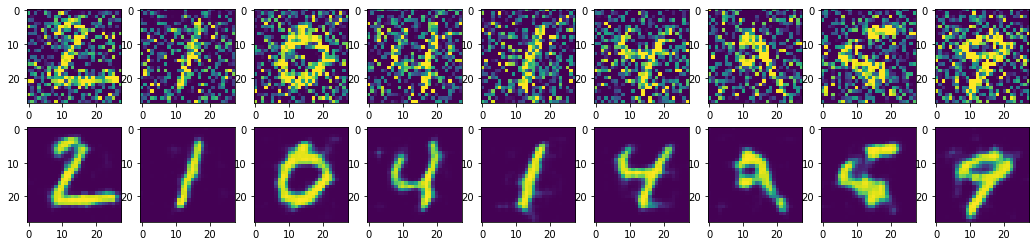

In [27]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    ax = plt.subplot(2, n, i+n)
    plt.imshow(predict[i].reshape(28, 28))